<a href="https://colab.research.google.com/github/YeshKimani/AI-Coursework2025/blob/main/MallCustomers_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

156792-Gibson Kingori
153845-Grace Wambugu
158430-Yeshua Kimani
167746-Desmond Turkmen
134779-Celestine Nyingi
166912-Steve Mochoge



In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


import warnings
warnings.filterwarnings('ignore')


sns.set_style('darkgrid')




✅ Data loaded successfully!
First look at the data:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
=== DATA CLEANING ===
Before cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4

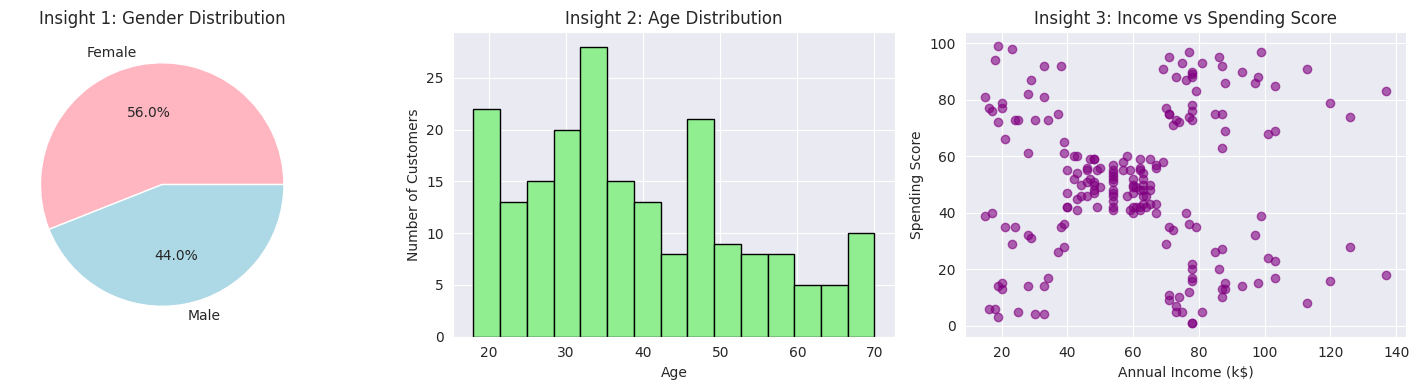


**3 KEY INSIGHTS FROM THE DATA:**
1. Gender Balance: We have 112 females and 88 males
2. Age Range: Customers are between 18 and 70 years old
3. Spending Patterns: There are clear groups in the scatter plot - some with high income/low spending, some with low income/high spending!


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv('Mall_Customers.csv')

print("✅ Data loaded successfully!")
print("First look at the data:")
print(df.head())


print("=== DATA CLEANING ===")
print("Before cleaning:")
print(df.info())


df_clean = df.drop('CustomerID', axis=1)
df_clean.rename(columns={'Annual Income (k$)': 'AnnualIncome',
                        'Spending Score (1-100)': 'SpendingScore'},
               inplace=True)

print("\nAfter cleaning:")
print(df_clean.info())
print("\nMissing values:")
print(df_clean.isnull().sum())


print("\n=== EXPLORATORY DATA ANALYSIS ===")


plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
gender_counts = df_clean['Gender'].value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightpink', 'lightblue'])
plt.title('Insight 1: Gender Distribution')


plt.subplot(1, 3, 2)
plt.hist(df_clean['Age'], bins=15, color='lightgreen', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Insight 2: Age Distribution')


plt.subplot(1, 3, 3)
plt.scatter(df_clean['AnnualIncome'], df_clean['SpendingScore'], alpha=0.6, color='purple')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('Insight 3: Income vs Spending Score')

plt.tight_layout()
plt.show()


print("\n**3 KEY INSIGHTS FROM THE DATA:**")
print(f"1. Gender Balance: We have {gender_counts['Female']} females and {gender_counts['Male']} males")
print(f"2. Age Range: Customers are between {df_clean['Age'].min()} and {df_clean['Age'].max()} years old")
print(f"3. Spending Patterns: There are clear groups in the scatter plot - some with high income/low spending, some with low income/high spending!")

=== 3A: CLUSTERING WITH 1 FEATURE (SPENDING SCORE) ===


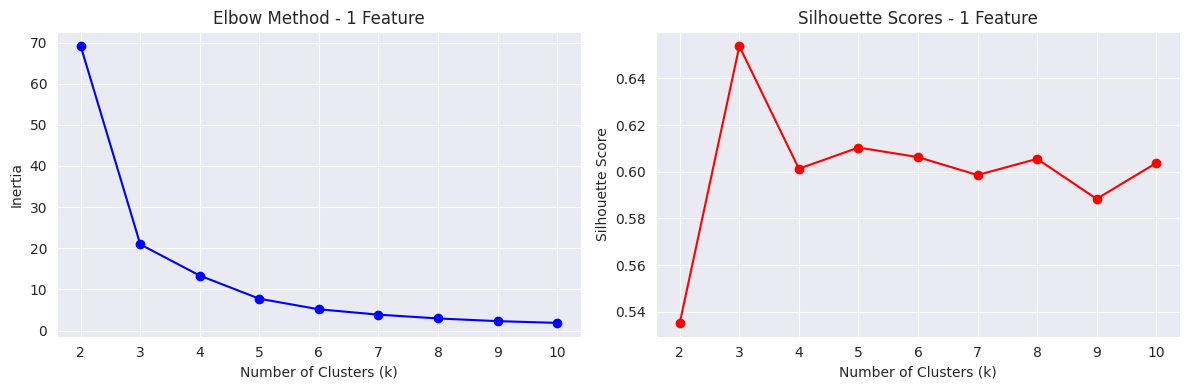

Based on the graphs, let's choose k = 4 for 1 feature clustering

=== 3B: CLUSTERING WITH 2 FEATURES (INCOME & SPENDING) ===


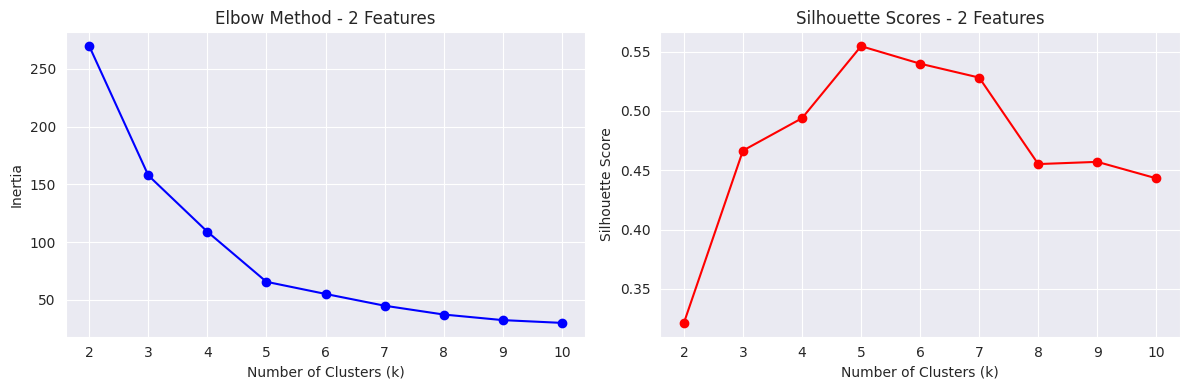

Based on the graphs, let's choose k = 5 for 2 feature clustering

Clustering completed! Added cluster labels to our dataframe.
   AnnualIncome  SpendingScore  Cluster_1Feature  Cluster_2Features
0            15             39                 2                  4
1            15             81                 1                  2
2            16              6                 3                  4
3            16             77                 1                  2
4            17             40                 2                  4
5            17             76                 1                  2
6            18              6                 3                  4
7            18             94                 1                  2
8            19              3                 3                  4
9            19             72                 1                  2


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


scaler = StandardScaler()


print("=== 3A: CLUSTERING WITH 1 FEATURE (SPENDING SCORE) ===")
X_1feature = df_clean[['SpendingScore']].values
X_1feature_scaled = scaler.fit_transform(X_1feature)


k_range = range(2, 11)
inertia_1f = []
sil_scores_1f = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_1feature_scaled)
    inertia_1f.append(kmeans.inertia_)
    sil_scores_1f.append(silhouette_score(X_1feature_scaled, kmeans.labels_))


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia_1f, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method - 1 Feature')

plt.subplot(1, 2, 2)
plt.plot(k_range, sil_scores_1f, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores - 1 Feature')

plt.tight_layout()
plt.show()


optimal_k_1f = 4
print(f"Based on the graphs, let's choose k = {optimal_k_1f} for 1 feature clustering")


kmeans_1f = KMeans(n_clusters=optimal_k_1f, random_state=42, n_init=10)
clusters_1f = kmeans_1f.fit_predict(X_1feature_scaled)
df_clean['Cluster_1Feature'] = clusters_1f


print("\n=== 3B: CLUSTERING WITH 2 FEATURES (INCOME & SPENDING) ===")
X_2features = df_clean[['AnnualIncome', 'SpendingScore']].values
X_2features_scaled = scaler.fit_transform(X_2features)


inertia_2f = []
sil_scores_2f = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_2features_scaled)
    inertia_2f.append(kmeans.inertia_)
    sil_scores_2f.append(silhouette_score(X_2features_scaled, kmeans.labels_))


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia_2f, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method - 2 Features')

plt.subplot(1, 2, 2)
plt.plot(k_range, sil_scores_2f, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores - 2 Features')

plt.tight_layout()
plt.show()


optimal_k_2f = 5
print(f"Based on the graphs, let's choose k = {optimal_k_2f} for 2 feature clustering")


kmeans_2f = KMeans(n_clusters=optimal_k_2f, random_state=42, n_init=10)
clusters_2f = kmeans_2f.fit_predict(X_2features_scaled)
df_clean['Cluster_2Features'] = clusters_2f

print("\nClustering completed! Added cluster labels to our dataframe.")
print(df_clean[['AnnualIncome', 'SpendingScore', 'Cluster_1Feature', 'Cluster_2Features']].head(10))

=== QUESTION 4: VISUALIZE AND COMPARE CLUSTERS ===


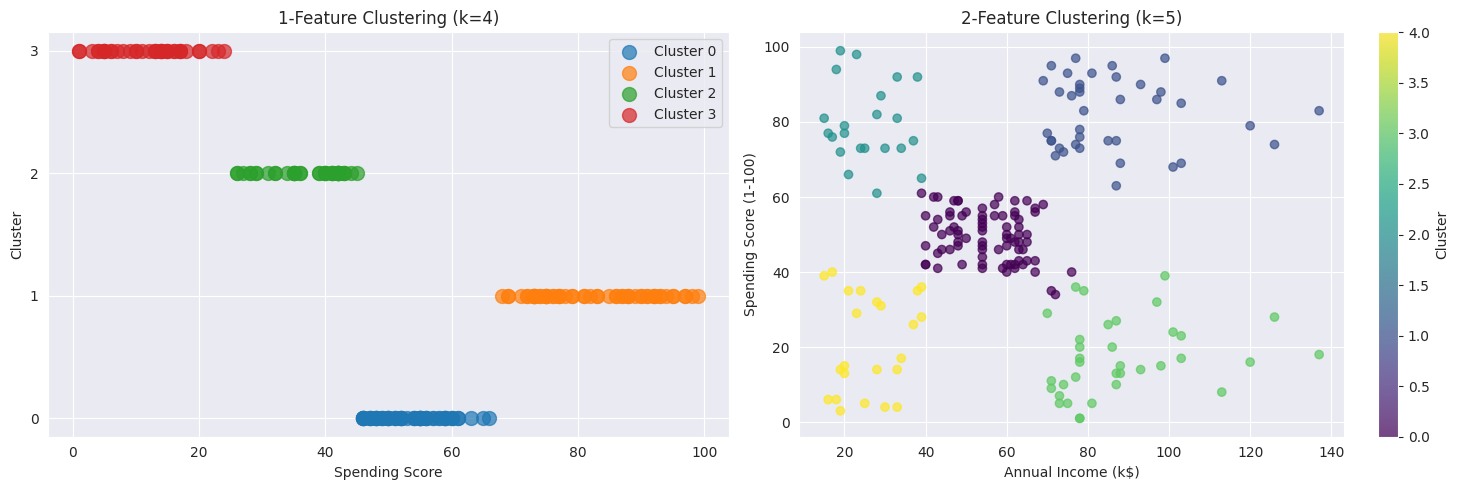


**COMPARISON OF CLUSTERING RESULTS:**
1-FEATURE CLUSTERING (Spending Score only):
- Groups customers based only on their spending behavior
- Simple but misses the relationship between income and spending

2-FEATURE CLUSTERING (Income + Spending Score):
- Creates more meaningful customer segments
- We can identify groups like: High Income/Low Spending, Low Income/High Spending, etc.
- Much more useful for business decisions!


In [ ]:
print("=== QUESTION 4: VISUALIZE AND COMPARE CLUSTERS ===")

plt.figure(figsize=(15, 5))


plt.subplot(1, 2, 1)
for cluster in range(optimal_k_1f):
    cluster_data = df_clean[df_clean['Cluster_1Feature'] == cluster]
    plt.scatter(cluster_data['SpendingScore'], [cluster] * len(cluster_data),
               label=f'Cluster {cluster}', alpha=0.7, s=100)
plt.xlabel('Spending Score')
plt.ylabel('Cluster')
plt.title(f'1-Feature Clustering (k={optimal_k_1f})')
plt.legend()
plt.yticks(range(optimal_k_1f))


plt.subplot(1, 2, 2)
scatter = plt.scatter(df_clean['AnnualIncome'], df_clean['SpendingScore'],
                     c=df_clean['Cluster_2Features'], cmap='viridis', alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title(f'2-Feature Clustering (k={optimal_k_2f})')
plt.colorbar(scatter, label='Cluster')

plt.tight_layout()
plt.show()

print("\n**COMPARISON OF CLUSTERING RESULTS:**")
print("1-FEATURE CLUSTERING (Spending Score only):")
print("- Groups customers based only on their spending behavior")
print("- Simple but misses the relationship between income and spending")

print("\n2-FEATURE CLUSTERING (Income + Spending Score):")
print("- Creates more meaningful customer segments")
print("- We can identify groups like: High Income/Low Spending, Low Income/High Spending, etc.")
print("- Much more useful for business decisions!")

In [ ]:
print("=== QUESTION 5: BUSINESS RECOMMENDATIONS ===")


cluster_analysis = df_clean.groupby('Cluster_2Features')[['AnnualIncome', 'SpendingScore']].mean()
print("Average profile of each cluster:")
print(cluster_analysis)

print("\n" + "="*50)
print("CUSTOMER ENGAGEMENT STRATEGIES FOR MALL MANAGEMENT")
print("="*50)


cluster_descriptions = {
    0: "Standard Customers - Medium income, medium spending",
    1: "Careful Spenders - High income, low spending",
    2: "Target Customers - High income, high spending",
    3: "Budget Customers - Low income, low spending",
    4: "Carefree Spenders - Low income, high spending"
}

for cluster_num in range(optimal_k_2f):
    cluster_data = df_clean[df_clean['Cluster_2Features'] == cluster_num]
    avg_income = cluster_data['AnnualIncome'].mean()
    avg_spending = cluster_data['SpendingScore'].mean()
    size = len(cluster_data)

    print(f"\n--- CLUSTER {cluster_num}: {cluster_descriptions[cluster_num]} ---")
    print(f"Size: {size} customers ({size/len(df_clean)*100:.1f}% of total)")
    print(f"Profile: ${avg_income:.0f}k average income, {avg_spending:.0f} average spending score")


    if cluster_num == 0:
        print("Engagement: Regular promotions, loyalty programs, family packages")
    elif cluster_num == 1:
        print("Engagement: Premium quality products, investment pieces, emphasize value")
    elif cluster_num == 2:
        print("Engagement: Exclusive events, personal shopping, luxury brand promotions")
    elif cluster_num == 3:
        print("Engagement: Sales, discounts, value bundles, essential items")
    elif cluster_num == 4:
        print("Engagement: Trendy items, social media campaigns, 'buy now pay later' options")

print(f"\n🎯 KEY BUSINESS INSIGHT:")
print(f"Focus most marketing budget on Cluster 2 (High Income/High Spending) - they are your most valuable customers!")
print(f"Cluster 1 (High Income/Low Spending) has high potential - convert them to big spenders!")

=== QUESTION 5: BUSINESS RECOMMENDATIONS ===
Average profile of each cluster:
                   AnnualIncome  SpendingScore
Cluster_2Features                             
0                     55.296296      49.518519
1                     86.538462      82.128205
2                     25.727273      79.363636
3                     88.200000      17.114286
4                     26.304348      20.913043

CUSTOMER ENGAGEMENT STRATEGIES FOR MALL MANAGEMENT

--- CLUSTER 0: Standard Customers - Medium income, medium spending ---
Size: 81 customers (40.5% of total)
Profile: $55k average income, 50 average spending score
Engagement: Regular promotions, loyalty programs, family packages

--- CLUSTER 1: Careful Spenders - High income, low spending ---
Size: 39 customers (19.5% of total)
Profile: $87k average income, 82 average spending score
Engagement: Premium quality products, investment pieces, emphasize value

--- CLUSTER 2: Target Customers - High income, high spending ---
Size: 22 custom

Saving Screenshot 2025-10-29 212413.png to Screenshot 2025-10-29 212413.png


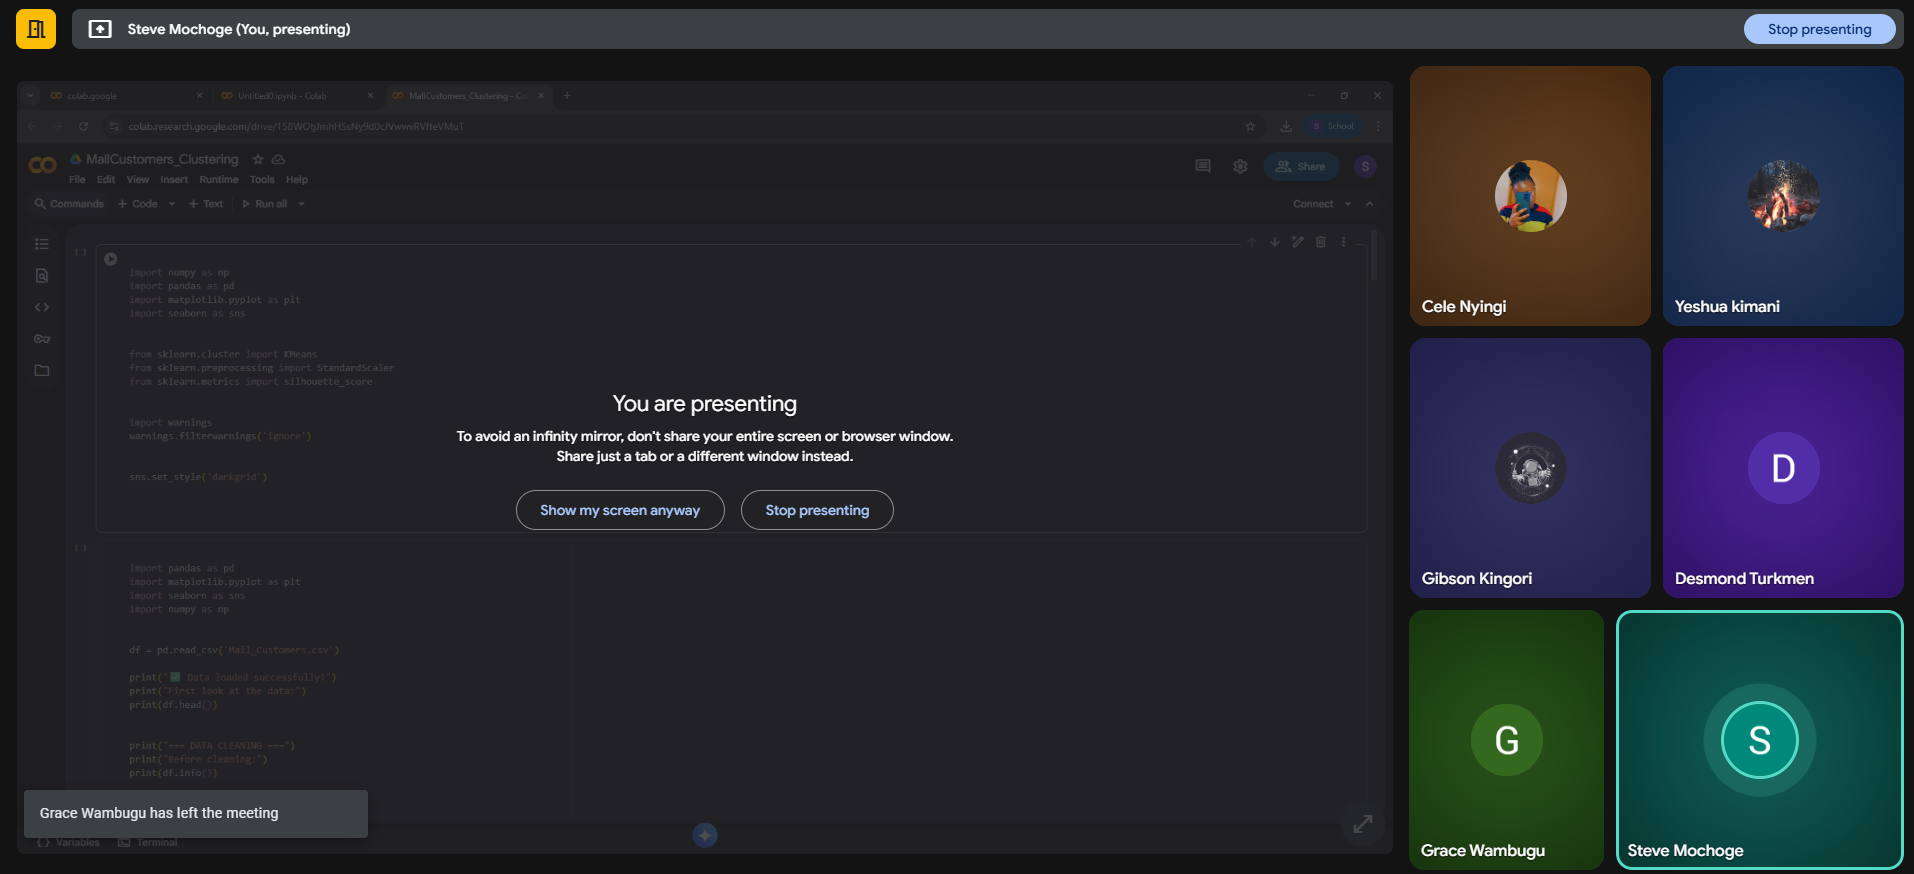

✅ Screenshot 2025-10-29 212413.png uploaded successfully!


In [ ]:

from google.colab import files
from IPython.display import Image, display

uploaded = files.upload()
for filename in uploaded.keys():
    display(Image(filename=filename))
    print(f"✅ {filename} uploaded successfully!")